### 1. Import modules

In [1]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC

### 2. Data preprocessing functions

In [2]:
def create_date_stamp(date_string: str) -> int:
    y = date_string.split("/")[-1]

    if len(y) == 4:
        t = datetime.strptime(date_string, "%d/%m/%Y").timestamp()
    else:
        t = datetime.strptime(date_string, "%d/%m/%y").timestamp()

    return int(t)


def split_into_seasons(df):
    ...

### 3. Load training and testing data

In [3]:
# Load datasets
present_data = pd.read_csv("data/epl-training.csv")
future_data = pd.read_csv("data/epl-test.csv")


# Format data
def create_onehot(name, df):
    df = pd.get_dummies(df[name], drop_first=True)
    df.columns = df.columns.map(lambda s : f"{name}({s})")

    return df


home_team_df = create_onehot("HomeTeam", present_data)
away_team_df = create_onehot("AwayTeam", present_data)
referee_df = create_onehot("Referee", present_data)

y = present_data["FTR"]
X = present_data[["DateStamp"]].join(home_team_df).join(away_team_df).join(referee_df)

target_names = ["A", "D", "H"] # alphabetised label names, for metrics

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Create SVM model

Specifically, we are going to fit our model to our data and then predict the testing results

In [4]:
clf = make_pipeline(MinMaxScaler(), SVC(probability=False))
clf.fit(X=X_train, y=y_train)

y_pred = clf.predict(X_test)

### 5. Get performance metrics

We're going to print a classification report and print some graphs and charts now

              precision    recall  f1-score   support

           A       0.54      0.44      0.49       516
           D       0.28      0.03      0.05       460
           H       0.52      0.86      0.65       792

    accuracy                           0.52      1768
   macro avg       0.45      0.44      0.39      1768
weighted avg       0.46      0.52      0.45      1768



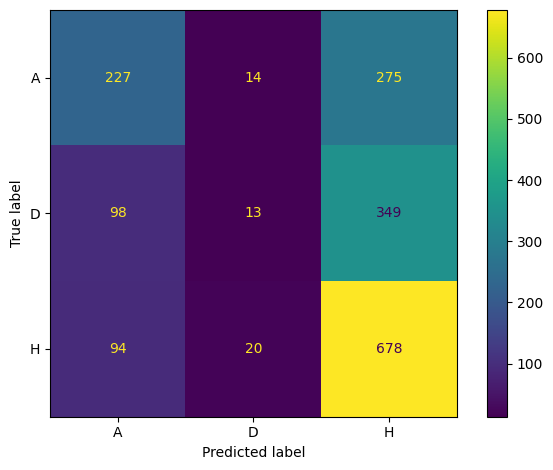

In [5]:
def evaluate_model(y_test, y_pred, target_names):
    print(classification_report(y_test, y_pred, target_names=target_names))

    ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=target_names)
    plt.tight_layout()
    plt.show()


evaluate_model(y_test, y_pred, target_names)